<a href="https://colab.research.google.com/github/shivanggarg1998/Suggestion-Mining/blob/master/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# DATA CLEANING AND VISUALIZATION
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer         #using lemmitizer for stemming the words
lemmatizer=WordNetLemmatizer()
from nltk.corpus import wordnet
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

from nltk import pos_tag

def stem(words):
    output_words=[]
    if len(words)!=0:
      words[0] = words[0].lower()
    for w in words:
            pos=pos_tag([w])
            simple_pos = get_simple_pos(pos[0][1])
            clean_word=lemmatizer.lemmatize(w,simple_pos)
            output_words.append(clean_word.lower())
    return output_words

pd.set_option("display.max_colwidth", 400) 

In [0]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [0]:
import re 

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


In [0]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Suggestion-Mining2/Suggestion-Mining')

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [129]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
# IMPORTING DATA
train_data=pd.read_csv("./Data/TrainingData.csv")
test_data=pd.read_csv("./Data/SubtaskA_Trial_Test_Labeled.csv")
valid_data=pd.read_csv("./Data/SubtaskA_EvaluationData_labeled.csv")

In [131]:
# PEAKING INTO DATA AND ITS FEATURES
print(train_data.shape)
train_data.head()

(8500, 3)


,id,sentence,label
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0


In [132]:
print(test_data.shape)
test_data.head()

(592, 3)


,id,sentence,label
0,1310_1,"I'm not asking Microsoft to Gives permission like Android so any app can take my data, but don't keep it restricted like iPhone.",1
1,1312_1,somewhere between Android and iPhone.,0
2,1313_1,And in the Windows Store you can flag the App [Requires Trust] for example.,0
3,1313_2,"Many thanks Sameh Hi, As we know, there is a lot of limitations is WP8 OS due the high security in the OS itself which is very good, but some time we need to allow some apps to do extra works, apps which we trust i.e: hotmail app, facebook app, skype app ....",0
4,1313_3,"The idea is that we can develop a regular app and we request our permissions in the manifest, OR the app can ASK FOR TRUST_�_ more",1


In [133]:
print(valid_data.shape)
valid_data.head()

(833, 3)


,id,sentence,label
0,9566,This would enable live traffic aware apps.,0
1,9569,Please try other formatting like bold italics shadow to distinguish titles/subtitles from content.,1
2,9576,Since computers were invented to save time I suggest we be allowed to upload them all in one zip file - using numbering for the file names and the portal could place them in the right order.,1
3,9577,Allow rearranging if the user wants to change them!,1
4,9579,Add SIMD instructions for better use of ARM NEON instructions for math and games.,1


In [134]:
# GETTING THE MAXIMUM LENGTH OF THE STRING
len_train= train_data['sentence'].str.len()
print(len_train)

0       268
1       282
2       108
3        68
4        72
       ... 
8495     67
8496    111
8497    110
8498    179
8499    186
Name: sentence, Length: 8500, dtype: int64


In [135]:
# APPENDING ALL THE DATA INTO ONE TO EASE THE CLEANING PROCESS
combined= train_data.append(test_data,ignore_index=True)
combined= combined.append(valid_data,ignore_index=True)
print(combined.shape)
combined.head()

(9925, 3)


,id,sentence,label
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0


In [0]:
def removeic(text):
  if len(text)>=2:
    if text[0]=='"':
      text = text[1:]
    if text[-1]=='"':
      text = text[:-1]
  return text     

In [137]:
# PART 1: REMOVING THE DIGITS PUNCHTUATION AND SPECIAL CHARACTERS 
combined['clean'] = [removeic(expand_contractions(remove_accented_chars(i.lower()))) for i in combined['sentence']]
combined['clean'] = combined['clean'].str.replace("(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*"," ")
combined['clean']=combined['clean'].str.replace("\".*?\"|\(.*?\)|<.*>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});|[^a-zA-Z#]"," ")
combined.head()

,id,sentence,label,clean
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1,please enable removing language code from the dev center for example if you ever selected and laguages and you published this xap to the store then it causes tile localization to show the en us tile localization which is bad
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0,note in your csproj file there is a supportedcultures entry like this when i removed the language code and published my new xap version the old xap version still remains in the store with
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0,wich means the new version not fully replaced the old version and this causes me very serious problems
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0,some of my users will still receive the old xap version of my app
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0,the store randomly gives the old xap or the new xap version of my app


In [138]:
# PART 2: TOKENIZING THE SENTENCES TO REMOVE STOP WORDS AND STEMMING PROCESS
tokenized_sentence= combined['clean'].apply(lambda x: x.split())
tokenized_sentence.head()

0    [please, enable, removing, language, code, from, the, dev, center, for, example, if, you, ever, selected, and, laguages, and, you, published, this, xap, to, the, store, then, it, causes, tile, localization, to, show, the, en, us, tile, localization, which, is, bad]
1                                               [note, in, your, csproj, file, there, is, a, supportedcultures, entry, like, this, when, i, removed, the, language, code, and, published, my, new, xap, version, the, old, xap, version, still, remains, in, the, store, with]
2                                                                                                                                                    [wich, means, the, new, version, not, fully, replaced, the, old, version, and, this, causes, me, very, serious, problems]
3                                                                                                                                                                                          

In [0]:
import nltk
words = set(nltk.corpus.words.words())

def clean(sentence):
    output_words = stem(sentence)
    output_wordsf = []
    for i in output_words:
      if i in words:
        output_wordsf.append(i)
    return output_wordsf   

In [140]:
# REMOVING THE STOP WORDS LIKE A, AN, AT, BY ETC
# nltk.download('stopwords')
# This caching makes the processing of thousands of strings very fast!
tokenized_sentence = tokenized_sentence.apply(
    lambda sentence: clean(sentence)
)
tokenized_sentence.head()

0    [please, enable, remove, language, code, from, the, dev, center, for, example, if, you, ever, select, and, and, you, publish, this, to, the, store, then, it, cause, tile, localization, to, show, the, en, u, tile, localization, which, be, bad]
1                                                                [note, in, your, file, there, be, a, entry, like, this, when, i, remove, the, language, code, and, publish, my, new, version, the, old, version, still, remains, in, the, store, with]
2                                                                                                                                       [mean, the, new, version, not, fully, replace, the, old, version, and, this, cause, me, very, serious, problem]
3                                                                                                                                                                                 [some, of, my, user, will, still, receive, the, old, version, of, my]
4       

In [141]:
# PART 3: CONVERTING WORDS TO THE LOWER CASES
tokenized_sentence = tokenized_sentence.apply(
    lambda sentence: [word.lower() for word in sentence]
)
tokenized_sentence.head()

0    [please, enable, remove, language, code, from, the, dev, center, for, example, if, you, ever, select, and, and, you, publish, this, to, the, store, then, it, cause, tile, localization, to, show, the, en, u, tile, localization, which, be, bad]
1                                                                [note, in, your, file, there, be, a, entry, like, this, when, i, remove, the, language, code, and, publish, my, new, version, the, old, version, still, remains, in, the, store, with]
2                                                                                                                                       [mean, the, new, version, not, fully, replace, the, old, version, and, this, cause, me, very, serious, problem]
3                                                                                                                                                                                 [some, of, my, user, will, still, receive, the, old, version, of, my]
4       

In [142]:
# DETOKNEIZING THE WORDS TO FORM SENTENCES AGAIN
detokenized_sentence= tokenized_sentence.apply(lambda x: ' '.join(x))
detokenized_sentence.head()

0    please enable remove language code from the dev center for example if you ever select and and you publish this to the store then it cause tile localization to show the en u tile localization which be bad
1                                                        note in your file there be a entry like this when i remove the language code and publish my new version the old version still remains in the store with
2                                                                                                                  mean the new version not fully replace the old version and this cause me very serious problem
3                                                                                                                                                       some of my user will still receive the old version of my
4                                                                                                                                                       the store ra

In [143]:
# THE BELOW DATA SHOWS THE REDUCTION IN THE CHARACTERS AFTER THE CLEANING PROCESS
combined['clean']=detokenized_sentence
combined.head()

,id,sentence,label,clean
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1,please enable remove language code from the dev center for example if you ever select and and you publish this to the store then it cause tile localization to show the en u tile localization which be bad
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0,note in your file there be a entry like this when i remove the language code and publish my new version the old version still remains in the store with
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0,mean the new version not fully replace the old version and this cause me very serious problem
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0,some of my user will still receive the old version of my
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0,the store randomly give the old or the new version of my


In [0]:
# SAVING THE CLEANED DATA TO DISK
combined.to_csv('CleanData.csv', encoding='utf-8', index=False)

In [0]:
# VISUALIZING THE COMMON WORDS IN SUGGESTIONS AND NORMAL WORDS
from wordcloud import WordCloud
def generateImage(words):
    wordcloud = WordCloud(width=1200,height=500,random_state=21,max_font_size=110).generate(words)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

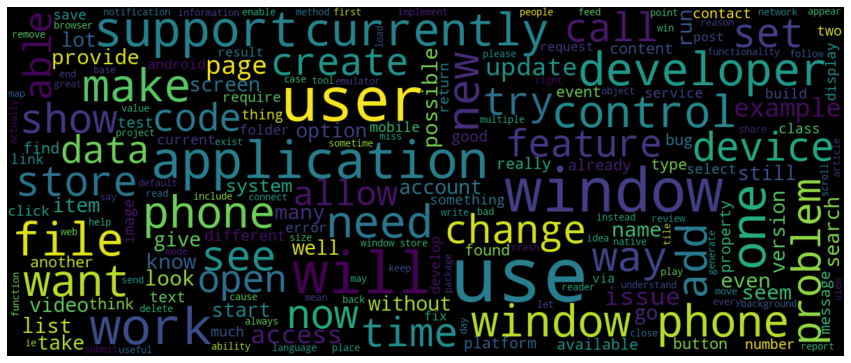

In [146]:
# COMMON WORDS IN NORMAL SENTENCES
normal_words=' '.join([text for text in combined['clean'][combined['label']==0]])
generateImage(normal_words)

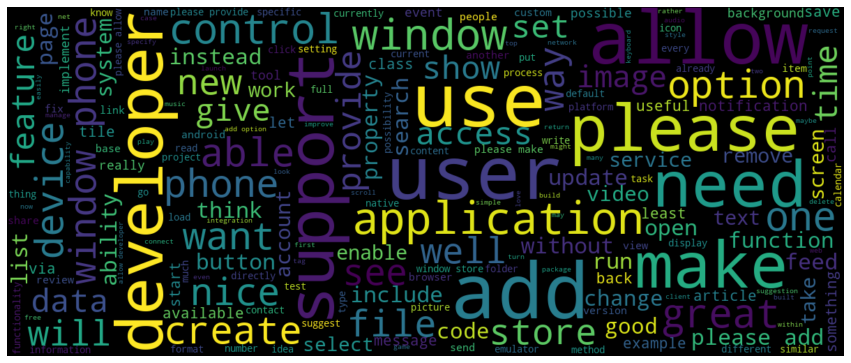

In [147]:
# COMMON WORDS IN SUGGESTIVE SENTENCES
suggestion_words=' '.join([text for text in combined['clean'][combined['label']==1]])
generateImage(suggestion_words)

In [0]:
# NO ACCURATE CONCLUSION CAN BE OBTAINED BY LOOKING AT THE FREQUNET WORDS IN THE CLASSES! NEED TO HAVE A MODEL FOR 
# ACCURATELY CLASSIFYING THE SENTENCES